<div>
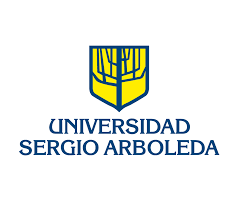<br><br><FONT FACE="times new roman" SIZE=5>
<b></b>
<br>
<i><b>Docente:</b></i> Joaquín Sánchez Nuñez
<br>
<i><b>Asignatura:</b></i> Sistemas Complejos
<br>
<i><b>Estudiante:</b></i> Esteban Rodriguez, Laura Ojeda, Daniel Velásquez y Santiago Niño
<br>
<i><b>Tema:</b></i> Máquina de Turing
<br>
<br> 7 de marzo del 2024
<br>
</FONT>
</div>

#Instrucciones

Implementar en python el concepto de máquina de Turing. Está máquina debe ser capaz de:



*   Sumar
*   Restar
*   Multiplicar
*   Dividir
*   Potenciación
*   El factorial de un numero entero.











#Bibliotecas

In [ ]:
!pip install simpleeval

In [ ]:
import re
import math
import matplotlib.pyplot as plt
import networkx as nx
from simpleeval import simple_eval, SimpleEval

#Contexto

El siguiente código implementa una máquina de Turing, un modelo teórico fundamental en ciencias computacionales propuesto por Alan Turing en 1936. Esta máquina es capaz de ejecutar operaciones aritméticas básicas ingresadas por el usuario, como sumar, restar, multiplicar, dividir, calcular potencias, factoriales de números enteros y la operación módulo. Utiliza una cinta infinita dividida en casillas, una cabeza lectora/escritora y un conjunto de estados de control para realizar las operaciones. La implementación se basa en la evaluación de expresiones matemáticas mediante la biblioteca SimpleEval de Python y una función personalizada para calcular factoriales. El flujo de ejecución se controla a través de un bucle principal que registra las transiciones de estado y las visualiza en un gráfico dirigido utilizando la biblioteca NetworkX. En conjunto, este código demuestra la versatilidad y potencia del modelo de máquina de Turing en la resolución de problemas computacionales.







#Implementación

In [ ]:
class TuringMachine:
    def __init__(self, tape):
        self.tape = tape
        self.head_position = 0
        self.state = 'q1'
        self.completed = False
        self.result = None
        self.se = SimpleEval()

    def run(self):
        transitions = []

        print(f"Comenzando la ejecución de la máquina de Turing...\n")

        while not self.completed:
            if self.state == 'q1':  # Estado para leer la expresión
                transitions.append(('q1', 'q2', None))
                print(f"Estado actual: {self.state}")
                self.print_tape()
                self.print_head_position()
                self.print_state()
                print(f"Siguiente estado: q2\n{'-'*40}")

                self.state = 'q2'

            elif self.state == 'q2':  # Estado para realizar la operación
                print(f"Estado actual: {self.state}")
                self.print_tape()
                self.print_head_position()
                self.print_state()
                print(f"Siguiente estado: q3\n{'-'*40}")

                expression = ''.join(self.tape).strip('_')
                print(f"Operación matemática ingresada: {expression}\n")
                try:
                    result = self.se.eval(expression)
                    if isinstance(result, float):
                        result = round(result, 2)  # Round to 2 decimal places
                    self.result = result
                except Exception as e:
                    print(f"Error al evaluar la expresión: {e}")
                    return
                self.state = 'q3'
                transitions.append(('q2', 'q3', expression))

            elif self.state == 'q3':  # Estado para imprimir el resultado
                print(f"Estado actual: {self.state}")
                self.print_tape()
                self.print_head_position()
                self.print_state()
                print(f"Siguiente estado: fin\n{'-'*40}")

                transitions.append(('q3', 'fin', str(self.result)))
                print(f"Resultado de la operación: {self.result}")
                self.state = 'fin'

            elif self.state == 'fin':  # Estado final
                self.completed = True

            else:
                print("Error: Estado desconocido")
                break

            # Movimiento del cabezal de la cinta
            if self.state != 'fin':
                if self.head_position < len(self.tape) - 1:
                    self.move_head_right()

        print(f"Estado actual: {self.state}\n")

        # Crear el grafo
        G = nx.DiGraph()
        for transition in transitions:
            if transition[2] is not None:
                G.add_edge(transition[0], transition[1], label=transition[2])
            else:
                G.add_edge(transition[0], transition[1])

        G.add_node('inicio')
        G.add_node('fin')
        G.add_edge('inicio', 'q1')
        G.add_edge('q3', 'fin')

        # Mostrar el grafo
        plt.figure(figsize=(10, 6))
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_size=1000, node_color="skyblue", font_size=10, font_weight="bold", arrowsize=20)
        edge_labels = {(i, j): lab.get('label', '') for i, j, lab in G.edges(data=True)}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
        plt.show()

        return

    def print_tape(self):
        tape_representation = [''] * len(self.tape)
        for i, bit in enumerate(self.tape):
            if bit.isdigit():
                binary_value = bin(int(bit))[2:].zfill(4)
                tape_representation[i] = f"{binary_value} ({bit})"
            else:
                tape_representation[i] = bit
        tape_representation[self.head_position] = '^'
        print(" ".join(tape_representation))

    def move_head_right(self):
        self.head_position += 1
        if self.head_position == len(self.tape):
            self.tape.append('_')

    def print_head_position(self):
        print(f"Posicion =  {self.head_position}")

    def print_state(self):
        print(f"Estado =  {self.state}")

# Parte principal del programa
while True:
    operation = input("Ingrese la operación a realizar (por ejemplo: '2+1'): ")

    if not re.match(r'^[0-9\+\-\*\/%!]+$', operation):  # Added '%' and '!' for factorial
        print("Error: La operación contiene caracteres no válidos.")
        continue

    if '!' in operation:
        number = int(operation[:-1])  # Extracting the number
        result = 1
        for i in range(1, number + 1):
            result *= i
        print(f"El factorial de {number} es: {result}")
    else:
        numbers = re.findall(r'[0-9]+', operation)
        binary_numbers = [bin(int(number))[2:].zfill(4) for number in numbers]  # Ajuste a 4 bits
        decimal_numbers = [str(int(number)) for number in numbers]
        operation = re.sub(r'[0-9]+', '{}', operation)

        tape = list(operation.format(*decimal_numbers)) + ['_']
        tm = TuringMachine(tape)
        tm.run()
    break
    #continuar = input("¿Desea realizar otra operación? (s/n): ")
    #if continuar.lower() != 's':
    #    print("¡Gracias por usar la máquina de Turing!")
    #    break

Ingrese la operación a realizar (por ejemplo: '2+1'): 10!
El factorial de 10 es: 3628800
